In [1]:
import pandas as pd

In [2]:
patch_responses = pd.read_csv('resources/linux/resources/filtered_responses.csv')

patch_responses = patch_responses[patch_responses['upstream'].notna()]
patch_responses.head()

,Unnamed: 0,patch_id,response_author,resp_parent,resp_msg_id,upstream,response_is_bot,bot_name,patch_author,responder,self_response
1,1,<0-v1-0bc346e08476+585-drop_offsetofend_jgg@me...,Jason Gunthorpe <jgg@ziepe.ca>,<0-v1-0bc346e08476+585-drop_offsetofend_jgg@me...,<20200529182915.GA18558@ziepe.ca>,ffd7339a2fac98b9ff731e336c4411bf1ce57e22,False,NaN,"('jason gunthorpe', 'jgg@ziepe.ca')","('jason gunthorpe', 'jgg@ziepe.ca')",True
12,12,<0-v1-ace813388969+48859-uverbs_poll_fix%jgg@m...,Leon Romanovsky <leon@kernel.org>,<0-v1-ace813388969+48859-uverbs_poll_fix%jgg@m...,<20200407051632.GL80989@unreal>,eb356e6dc15a30af604f052cd0e170450193c254,False,NaN,"('jason gunthorpe', 'jgg@ziepe.ca')","('leon romanovsky', 'leon@kernel.org')",False
14,14,<0-v1-ace813388969+48859-uverbs_poll_fix%jgg@m...,Jason Gunthorpe <jgg@ziepe.ca>,<0-v1-ace813388969+48859-uverbs_poll_fix%jgg@m...,<20200414190051.GC11664@ziepe.ca>,eb356e6dc15a30af604f052cd0e170450193c254,False,NaN,"('jason gunthorpe', 'jgg@ziepe.ca')","('jason gunthorpe', 'jgg@ziepe.ca')",True
22,22,<0-v1-fae83f600b4a+68-less_get_client_data%jgg...,Ursula Braun <ubraun@linux.ibm.com>,<0-v1-fae83f600b4a+68-less_get_client_data%jgg...,<91b0c86a-10d2-0427-eda9-39c1bf820ff5@linux.ib...,1587982e705db1ac090b05a7006771c78d0e8417,False,NaN,"('jason gunthorpe', 'jgg@ziepe.ca')","('ursula braun', 'ubraun@linux.ibm.com')",False
24,24,<0-v1-fae83f600b4a+68-less_get_client_data%jgg...,Jason Gunthorpe <jgg@ziepe.ca>,<0-v1-fae83f600b4a+68-less_get_client_data%jgg...,<20200414193103.GA20597@ziepe.ca>,1587982e705db1ac090b05a7006771c78d0e8417,False,NaN,"('jason gunthorpe', 'jgg@ziepe.ca')","('jason gunthorpe', 'jgg@ziepe.ca')",True


In [3]:
from pypasta.LinuxMaintainers import LinuxMaintainers
from pypasta import Config

config = Config('linux')

repo = config.repo
all_maintainers = LinuxMaintainers(repo, revision='v5.8')

def check_if_maintainer(line):
    commit = repo.get_commit(line['upstream'])
    filenames = commit.diff.affected
    maintainers = []
    for filename in filenames:
        sections = all_maintainers.get_sections_by_file(filename)
        sections -= {'THE REST'}
        for section in sections:
            _, mtrs, _ = all_maintainers.get_maintainers(section)
            maintainers += mtrs
    return commit.author.name.lower() in [x[0].lower() for x in maintainers]


In [4]:
patch_responses['author_is_maintainer'] = patch_responses.apply(check_if_maintainer, axis=1)

In [5]:
len(patch_responses[patch_responses['author_is_maintainer']])/len(patch_responses)

0.16934349070794313

### Distribution of the number of responses among patches

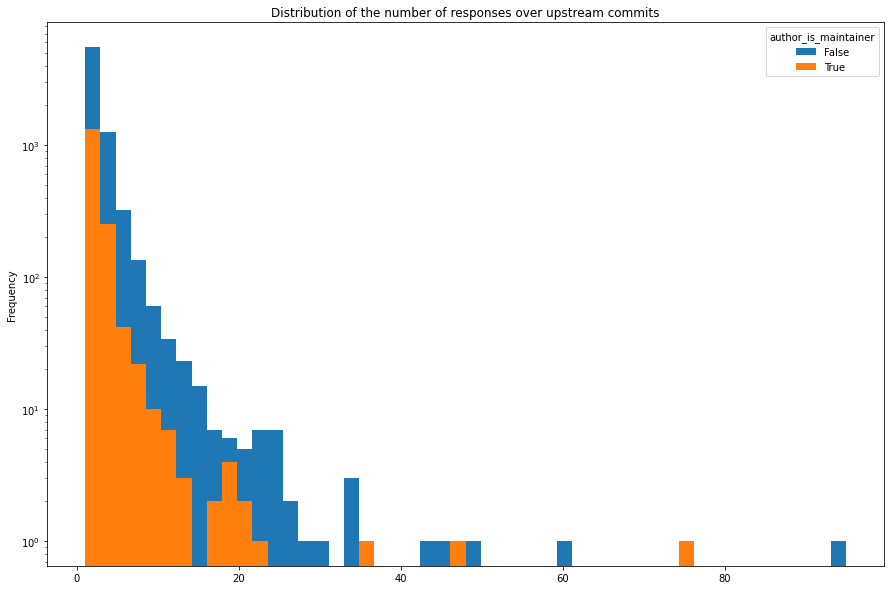

In [6]:
ax = patch_responses.groupby(['upstream', 'author_is_maintainer'])\
                    .nunique()['resp_msg_id']\
                    .unstack()\
                    .plot.hist(figsize=(15,10), bins=50, logy=True)

ax.set_title('Distribution of the number of responses over upstream commits')

ax.figure.savefig('dist_num_responses.pdf', bbox_inches = "tight")

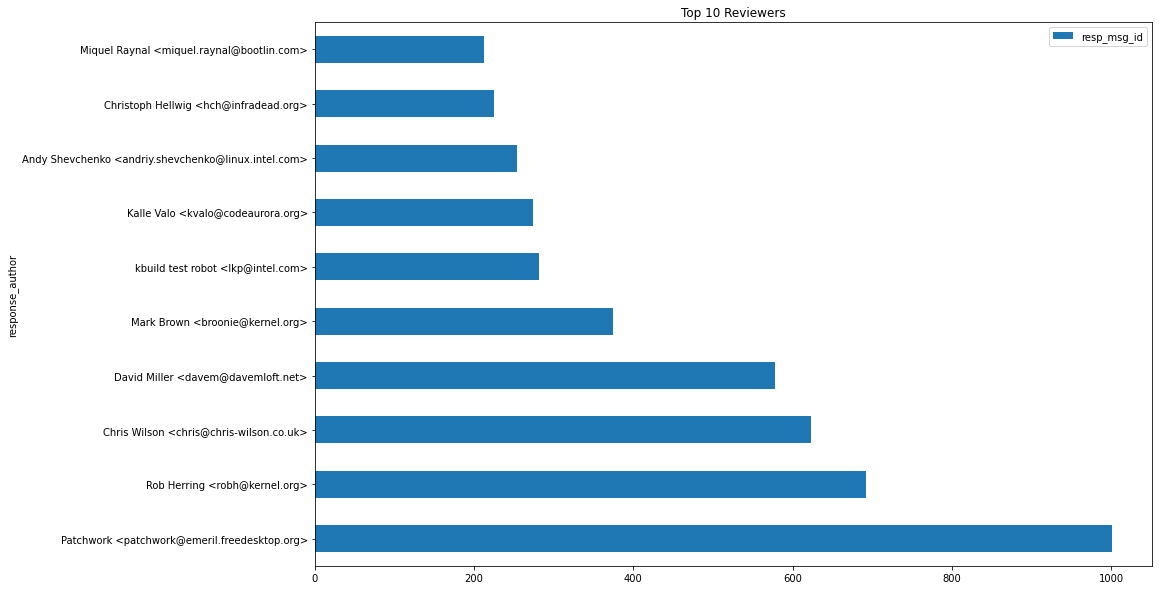

In [27]:
ax = patch_responses.groupby(['response_author'])\
                    .nunique()['resp_msg_id']\
                    .reset_index()\
                    .sort_values('resp_msg_id', ascending=False)[:10]\
                    .plot.barh(x ='response_author', figsize=(15,10
                                                             ))

ax.set_title('Top 10 Reviewers')

ax.figure.savefig('top_reviewers.pdf', bbox_inches = "tight")